## <font color=blue>Diabetes dataset<font>

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from tqdm import tqdm

In [2]:
def plot_confusion(clf, title, X_test, y_test):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title(title + '\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc))

In [3]:
# df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:500,2:]
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [4]:
df.head(2)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [5]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,8,26,17,14,18,73,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,1,1,7,3,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,53990,60234,57494,17756,40256,49949,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [6]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
Categories (6, object): [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
**************************************************
gender [Female, Male, Unknown/Invalid]
Categories (3, object): [Female, Male, Unknown/Invalid]
**************************************************
age [[0-10), [10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100)]
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]
**************************************************
weight [?, [75-100), [50-75), [0-25), [100-125), [25-50), [125-150), [175-200), [150-175), >200]
Categories (10, object): [?, [75-100), [50-75), [0-25), ..., [125-150), [175-200), [150-175), >200]
**************************************************
admission_type_id [6, 1, 2, 3, 4, 5, 8, 7]
Categories (8, object): [6, 1, 2, 3, 4, 5, 8, 7]
**************************************************
discharge_disposition_

### <font color =blue>1. remove columns with missing data</font>

In [7]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30


### <font color=blue> 2. remove incomplete columns and rows </font>

In [8]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(98052, 45)

In [9]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [10]:
show_unique(df)

race [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
**************************************************
gender [Female, Male]
Categories (2, object): [Female, Male]
**************************************************
age [[10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100), [0-10)]
Categories (10, object): [[10-20), [20-30), [30-40), [40-50), ..., [70-80), [80-90), [90-100), [0-10)]
**************************************************
admission_type_id [1, 2, 3, 6, 4, 5, 8, 7]
Categories (8, object): [1, 2, 3, 6, 4, 5, 8, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 2, 5, ..., 15, 24, 28, 19, 27]
Length: 26
Categories (26, object): [1, 3, 6, 2, ..., 24, 28, 19, 27]
**************************************************
admission_source_id [7, 2, 4, 1, 5, ..., 10, 22, 11, 25, 13]
Length: 17
Categories (17, object): [7, 2, 4, 1, ..., 22, 11, 

### <font color = blue>3. categorical variables</font>

In [11]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [12]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')
X_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'discharge_disposition_id_cat',
 'diabetesMed_cat',
 'race_cat',
 'troglitazone_cat',
 'acarbose_cat',
 'acetohexamide_cat',
 'metformin-pioglitazone_cat',
 'gender_cat',
 'glyburide_cat',
 'glipizide_cat',
 'pioglitazone_cat',
 'admission_source_id_cat',
 'age_cat',
 'insulin_cat',
 'diag_1_cat',
 'glimepiride_cat',
 'nateglinide_cat',
 'tolbutamide_cat',
 'max_glu_serum_cat',
 'rosiglitazone_cat',
 'tolazamide_cat',
 'glimepiride-pioglitazone_cat',
 'chlorpropamide_cat',
 'change_cat',
 'diag_2_cat',
 'metformin_cat',
 'repaglinide_cat',
 'miglitol_cat',
 'glipizide-metformin_cat',
 'A1Cresult_cat',
 'admission_type_id_cat',
 'diag_3_cat',
 'glyburide-metformin_cat']

In [13]:
df['readmitted'].head(11)

1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [14]:
df['readmitted_cat'].head(11)

1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    1
11    0
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [15]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

## <font color=green>to Categorical</font>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [17]:
X_train.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,...,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat,glyburide-metformin_cat
71878,5,50,1,23,0,0,0,9,16,1,...,0,225,1,1,0,0,2,0,23,1
58959,7,70,2,32,0,0,3,9,2,0,...,1,188,1,1,0,0,2,1,189,1


In [18]:
y_train.head(2)

71878    0
58959    2
Name: readmitted_cat, dtype: int8

In [19]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,...,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat,glyburide-metformin_cat
101706,3,66,1,18,0,0,1,9,0,1,...,0,186,1,1,0,0,0,0,221,1
73363,2,4,0,11,1,0,1,7,0,1,...,1,118,1,1,0,0,2,0,46,1


In [20]:
y_test.head(2)

101706    1
73363     1
Name: readmitted_cat, dtype: int8

### <font color=green>min max scaling</font>

In [21]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
discharge_disposition_id_cat     int8
diabetesMed_cat                  int8
race_cat                         int8
troglitazone_cat                 int8
acarbose_cat                     int8
acetohexamide_cat                int8
metformin-pioglitazone_cat       int8
gender_cat                       int8
glyburide_cat                    int8
glipizide_cat                    int8
pioglitazone_cat                 int8
admission_source_id_cat          int8
age_cat                          int8
insulin_cat                      int8
diag_1_cat                      int16
glimepiride_cat                  int8
nateglinide_cat                  int8
tolbutamide_cat                  int8
max_glu_seru

#### <font color=green>before scale</font>

In [22]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,...,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat,glyburide-metformin_cat
count,73539.000000,73539.000000,73539.000000,73539.0000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,...,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,4.427678,43.155305,1.348998,16.0989,0.372496,0.201988,0.646229,7.509974,5.251703,0.766355,...,0.540040,199.920110,1.195121,1.015801,0.000422,0.000122,1.895783,1.024994,202.153225,1.006772
std,3.000109,19.748888,1.704406,8.0961,1.254258,0.930706,1.264435,1.833319,6.692151,0.423152,...,0.498398,113.822475,0.434937,0.136970,0.024178,0.011062,0.517859,1.440650,137.354758,0.083329
min,1.000000,1.000000,0.000000,1.0000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.0000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,0.000000,99.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,90.000000,1.000000
50%,4.000000,44.000000,1.000000,15.0000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,...,1.000000,188.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,182.000000,1.000000
75%,6.000000,57.000000,2.000000,20.0000,0.000000,0.000000,1.000000,9.000000,13.000000,1.000000,...,1.000000,275.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,273.000000,1.000000
max,14.000000,129.000000,6.000000,79.0000,42.000000,76.000000,21.000000,16.000000,25.000000,1.000000,...,1.000000,747.000000,3.000000,3.000000,3.000000,1.000000,3.000000,7.000000,789.000000,3.000000


In [23]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,...,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat,glyburide-metformin_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,...,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.00000,24513.000000,24513.000000,24513.000000
mean,4.405010,43.127932,1.355852,16.181659,0.388039,0.203892,0.648799,7.518460,5.206013,0.774813,...,0.532779,200.782809,1.196263,1.015420,0.000571,0.000163,1.89683,1.016318,202.719455,1.006976
std,2.971848,19.600328,1.720647,8.145418,1.366935,0.978576,1.290618,1.829952,6.673796,0.417714,...,0.498935,114.742964,0.435117,0.134005,0.029953,0.012773,0.51638,1.433375,136.473911,0.083720
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,0.000000,99.000000,1.000000,1.000000,0.000000,0.000000,2.00000,0.000000,90.000000,1.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,...,1.000000,188.000000,1.000000,1.000000,0.000000,0.000000,2.00000,0.000000,182.000000,1.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,13.000000,1.000000,...,1.000000,276.000000,1.000000,1.000000,0.000000,0.000000,2.00000,2.000000,272.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,63.000000,16.000000,16.000000,25.000000,1.000000,...,1.000000,748.000000,3.000000,3.000000,3.000000,1.000000,3.00000,7.000000,784.000000,3.000000


In [24]:
# scaler = MinMaxScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_features)
# X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)

#### <font color=green>after scale</font>

In [25]:
X_train.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,race_cat,troglitazone_cat,acarbose_cat,acetohexamide_cat,metformin-pioglitazone_cat,gender_cat,glyburide_cat,glipizide_cat,pioglitazone_cat,admission_source_id_cat
count,73539.000000,73539.000000,73539.000000,73539.0000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.0,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,4.427678,43.155305,1.348998,16.0989,0.372496,0.201988,0.646229,7.509974,5.251703,0.766355,2.657474,0.000027,0.003155,0.0,0.000014,0.461850,1.101837,1.121514,1.071663,5.006758
std,3.000109,19.748888,1.704406,8.0961,1.254258,0.930706,1.264435,1.833319,6.692151,0.423152,0.863144,0.005215,0.059148,0.0,0.003688,0.498546,0.344832,0.365169,0.271041,3.696813
min,1.000000,1.000000,0.000000,1.0000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.0000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,4.000000,44.000000,1.000000,15.0000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000
75%,6.000000,57.000000,2.000000,20.0000,0.000000,0.000000,1.000000,9.000000,13.000000,1.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,14.000000,129.000000,6.000000,79.0000,42.000000,76.000000,21.000000,16.000000,25.000000,1.000000,5.000000,1.000000,3.000000,0.0,1.000000,1.000000,3.000000,3.000000,3.000000,15.000000


In [26]:
X_train.iloc[:,21:40].describe()

,insulin_cat,diag_1_cat,glimepiride_cat,nateglinide_cat,tolbutamide_cat,max_glu_serum_cat,rosiglitazone_cat,tolazamide_cat,glimepiride-pioglitazone_cat,chlorpropamide_cat,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,1.399217,255.434518,1.050232,0.007792,0.000231,1.983954,1.063490,0.000340,0.000014,1.000911,0.540040,199.920110,1.195121,1.015801,0.000422,0.000122,1.895783,1.024994,202.153225
std,0.836702,122.229602,0.240641,0.096340,0.015203,0.312274,0.254166,0.018435,0.003688,0.032763,0.498398,113.822475,0.434937,0.136970,0.024178,0.011062,0.517859,1.440650,137.354758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,190.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,99.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,90.000000
50%,1.000000,228.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,188.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,182.000000
75%,2.000000,350.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,275.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,273.000000
max,3.000000,716.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,747.000000,3.000000,3.000000,3.000000,1.000000,3.000000,7.000000,789.000000


In [27]:
y_train.describe()

count    73539.000000
mean         1.423068
std          0.684500
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

In [28]:
X_test.shape

(24513, 41)

In [29]:
X_test.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,race_cat,troglitazone_cat,acarbose_cat,acetohexamide_cat,metformin-pioglitazone_cat,gender_cat,glyburide_cat,glipizide_cat,pioglitazone_cat,admission_source_id_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000
mean,4.405010,43.127932,1.355852,16.181659,0.388039,0.203892,0.648799,7.518460,5.206013,0.774813,2.663525,0.000041,0.003386,0.000041,0.0,0.459144,1.101456,1.123078,1.074409,5.029372
std,2.971848,19.600328,1.720647,8.145418,1.366935,0.978576,1.290618,1.829952,6.673796,0.417714,0.853947,0.006387,0.062163,0.006387,0.0,0.498338,0.342456,0.365562,0.275634,3.694889
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,8.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,63.000000,16.000000,16.000000,25.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.0,1.000000,3.000000,3.000000,3.000000,16.000000


In [30]:
X_test.iloc[:,21:40].describe()

,insulin_cat,diag_1_cat,glimepiride_cat,nateglinide_cat,tolbutamide_cat,max_glu_serum_cat,rosiglitazone_cat,tolazamide_cat,glimepiride-pioglitazone_cat,chlorpropamide_cat,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.00000,24513.000000,24513.000000
mean,1.406519,255.717293,1.050585,0.007139,0.000204,1.983152,1.061314,0.000530,0.0,1.000816,0.532779,200.782809,1.196263,1.015420,0.000571,0.000163,1.89683,1.016318,202.719455
std,0.846251,122.077590,0.241135,0.094684,0.014281,0.310160,0.251371,0.024732,0.0,0.029948,0.498935,114.742964,0.435117,0.134005,0.029953,0.012773,0.51638,1.433375,136.473911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,1.000000,190.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.0,1.000000,0.000000,99.000000,1.000000,1.000000,0.000000,0.000000,2.00000,0.000000,90.000000
50%,1.000000,225.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,188.000000,1.000000,1.000000,0.000000,0.000000,2.00000,0.000000,182.000000
75%,2.000000,350.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,276.000000,1.000000,1.000000,0.000000,0.000000,2.00000,2.000000,272.000000
max,3.000000,715.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.0,3.000000,1.000000,748.000000,3.000000,3.000000,3.000000,1.000000,3.00000,7.000000,784.000000


In [31]:
y_test.describe()

count    24513.000000
mean         1.414433
std          0.687174
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

### <font color=green> Baseline Categorical</font>

In [32]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.54
test accuracy: 0.53
CPU times: user 18.5 ms, sys: 3.86 ms, total: 22.3 ms
Wall time: 22.1 ms


In [33]:
plot_confusion(d_major, 'Categorical Dummy Classifier', X_test, y_test)

<IPython.core.display.Javascript object>

Micro-averaged precision = 0.53 (treat instances equally)
Macro-averaged precision = 0.18 (treat classes equally)
Micro-averaged f1 = 0.53 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.00      0.00      0.00      8728
          2       0.53      1.00      0.69     12972

avg / total       0.28      0.53      0.37     24513



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
%%time
clf = LinearSVC(verbose=True).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

[LibLinear]training accuracy: 0.53
test accuracy: 0.52
CPU times: user 47.2 s, sys: 20.1 ms, total: 47.2 s
Wall time: 47.2 s


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


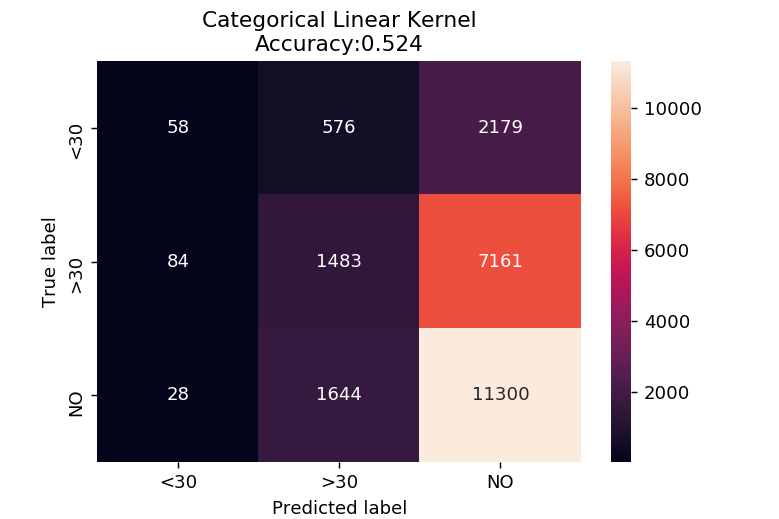

Micro-averaged precision = 0.52 (treat instances equally)
Macro-averaged precision = 0.43 (treat classes equally)
Micro-averaged f1 = 0.52 (treat instances equally)
Macro-averaged f1 = 0.32 (treat classes equally)
             precision    recall  f1-score   support

          0       0.34      0.02      0.04      2813
          1       0.40      0.17      0.24      8728
          2       0.55      0.87      0.67     12972

avg / total       0.47      0.52      0.45     24513



In [39]:
plot_confusion(clf, 'Categorical Linear Kernel Unnormalised', X_test, y_test)

## <font color=Orange>One Hot</font>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [41]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
discharge_disposition_id_cat     int8
diabetesMed_cat                  int8
race_cat                         int8
troglitazone_cat                 int8
acarbose_cat                     int8
acetohexamide_cat                int8
metformin-pioglitazone_cat       int8
gender_cat                       int8
glyburide_cat                    int8
glipizide_cat                    int8
pioglitazone_cat                 int8
admission_source_id_cat          int8
age_cat                          int8
insulin_cat                      int8
diag_1_cat                      int16
glimepiride_cat                  int8
nateglinide_cat                  int8
tolbutamide_cat                  int8
max_glu_seru

In [42]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,...,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat,glyburide-metformin_cat
count,73539.000000,73539.000000,73539.000000,73539.0000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,...,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,4.427678,43.155305,1.348998,16.0989,0.372496,0.201988,0.646229,7.509974,5.251703,0.766355,...,0.540040,199.920110,1.195121,1.015801,0.000422,0.000122,1.895783,1.024994,202.153225,1.006772
std,3.000109,19.748888,1.704406,8.0961,1.254258,0.930706,1.264435,1.833319,6.692151,0.423152,...,0.498398,113.822475,0.434937,0.136970,0.024178,0.011062,0.517859,1.440650,137.354758,0.083329
min,1.000000,1.000000,0.000000,1.0000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.0000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,0.000000,99.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,90.000000,1.000000
50%,4.000000,44.000000,1.000000,15.0000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,...,1.000000,188.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,182.000000,1.000000
75%,6.000000,57.000000,2.000000,20.0000,0.000000,0.000000,1.000000,9.000000,13.000000,1.000000,...,1.000000,275.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,273.000000,1.000000
max,14.000000,129.000000,6.000000,79.0000,42.000000,76.000000,21.000000,16.000000,25.000000,1.000000,...,1.000000,747.000000,3.000000,3.000000,3.000000,1.000000,3.000000,7.000000,789.000000,3.000000


In [43]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,discharge_disposition_id_cat,diabetesMed_cat,...,change_cat,diag_2_cat,metformin_cat,repaglinide_cat,miglitol_cat,glipizide-metformin_cat,A1Cresult_cat,admission_type_id_cat,diag_3_cat,glyburide-metformin_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,...,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.00000,24513.000000,24513.000000,24513.000000
mean,4.405010,43.127932,1.355852,16.181659,0.388039,0.203892,0.648799,7.518460,5.206013,0.774813,...,0.532779,200.782809,1.196263,1.015420,0.000571,0.000163,1.89683,1.016318,202.719455,1.006976
std,2.971848,19.600328,1.720647,8.145418,1.366935,0.978576,1.290618,1.829952,6.673796,0.417714,...,0.498935,114.742964,0.435117,0.134005,0.029953,0.012773,0.51638,1.433375,136.473911,0.083720
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,0.000000,99.000000,1.000000,1.000000,0.000000,0.000000,2.00000,0.000000,90.000000,1.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,...,1.000000,188.000000,1.000000,1.000000,0.000000,0.000000,2.00000,0.000000,182.000000,1.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,13.000000,1.000000,...,1.000000,276.000000,1.000000,1.000000,0.000000,0.000000,2.00000,2.000000,272.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,63.000000,16.000000,16.000000,25.000000,1.000000,...,1.000000,748.000000,3.000000,3.000000,3.000000,1.000000,3.00000,7.000000,784.000000,3.000000


In [44]:
to_num

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

### <font color=orange>scale numerical</font>

In [50]:
# scaler = MinMaxScaler()
# X_train_hot = pd.DataFrame(scaler.fit_transform(X_train[to_num]), columns=to_num)
# X_test_hot = pd.DataFrame(scaler.transform(X_test[to_num]), columns = to_num)
X_train_hot = X_train[to_num]
X_test_hot = X_test[to_num]

In [51]:
from sklearn.preprocessing import OneHotEncoder
hot_features = list(set(X_features) - set(to_num))
hot_features

['miglitol_cat',
 'troglitazone_cat',
 'metformin-pioglitazone_cat',
 'glimepiride-pioglitazone_cat',
 'diag_1_cat',
 'tolazamide_cat',
 'A1Cresult_cat',
 'glipizide-metformin_cat',
 'age_cat',
 'nateglinide_cat',
 'admission_type_id_cat',
 'discharge_disposition_id_cat',
 'race_cat',
 'acarbose_cat',
 'tolbutamide_cat',
 'max_glu_serum_cat',
 'glyburide-metformin_cat',
 'diag_3_cat',
 'admission_source_id_cat',
 'diabetesMed_cat',
 'gender_cat',
 'change_cat',
 'acetohexamide_cat',
 'glipizide_cat',
 'glimepiride_cat',
 'glyburide_cat',
 'chlorpropamide_cat',
 'diag_2_cat',
 'rosiglitazone_cat',
 'metformin_cat',
 'pioglitazone_cat',
 'repaglinide_cat',
 'insulin_cat']

In [52]:
enc = OneHotEncoder()
enc.fit(df[hot_features])
enc.n_values_

array([  4,   2,   2,   2, 717,   3,   4,   2,  10,   4,   8,  26,   6,
         4,   2,   4,   4, 790,  17,   2,   2,   2,   2,   4,   4,   4,
         4, 749,   4,   4,   4,   4,   4])

In [53]:
enc.feature_indices_

array([   0,    4,    6,    8,   10,  727,  730,  734,  736,  746,  750,
        758,  784,  790,  794,  796,  800,  804, 1594, 1611, 1613, 1615,
       1617, 1619, 1623, 1627, 1631, 1635, 2384, 2388, 2392, 2396, 2400,
       2404])

### <font color=orange> convert to one hot </font>

In [54]:
X_train_hot = pd.concat([X_train_hot, \
                         pd.DataFrame(enc.transform(X_train[hot_features]).toarray())], axis=1)

X_test_hot = pd.concat([X_test_hot, \
                         pd.DataFrame(enc.transform(X_test[hot_features]).toarray())], axis=1)

In [55]:
X_train_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
X_test_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### <font color=orange> SVM one hot</font>

In [57]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train_hot, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test_hot, y_test)))
plot_confusion(d_major, 'One Hot Dummy Classifier', X_test_hot, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [73539, 93983]

In [58]:
%%time
clf = LinearSVC(verbose=True).fit(X_train_hot, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test_hot, y_test)))
plot_confusion(clf, 'One Hot Linear Kernel', X_test_hot, y_test )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### <font color=orange>SVM optimise over accuracy</font>

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = LinearSVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000]}  
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs=4)
grid_clf_acc.fit(X_train_hot, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_hot) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

In [ ]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:7]

In [ ]:
plot_confusion(grid_clf_acc, 'One Hot Grid Search Linear', X_test_hot, y_test)